The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. 

The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y).

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
data = pd.read_csv('/content/banking.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


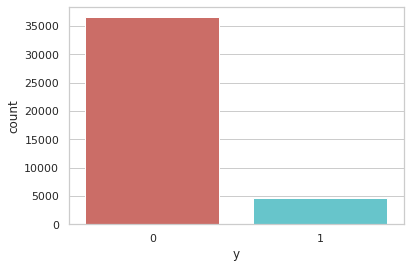

In [4]:
# Barplot for the dependent variable

sns.countplot(x='y',data=data, palette='hls')
plt.show()

In [5]:
# Check the missing values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

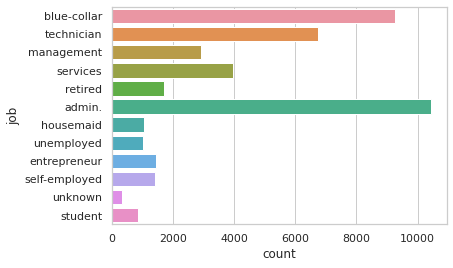

In [6]:
# Customer job distribution
sns.countplot(y="job", data=data)
plt.show()

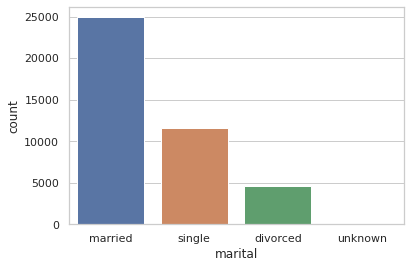

In [7]:
# Customer marital status distribution
sns.countplot(x="marital", data=data)
plt.show()

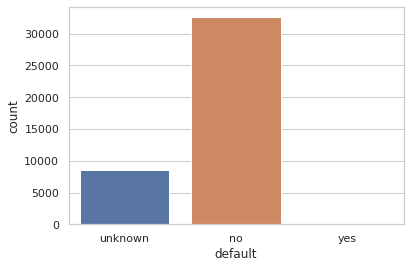

In [9]:
# Barplot for credit in default
sns.countplot(x="default", data=data)
plt.show()

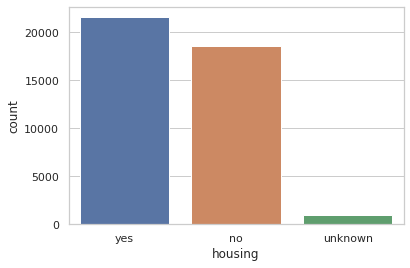

In [10]:
# Barplot for housing loan
sns.countplot(x="housing", data=data)
plt.show()

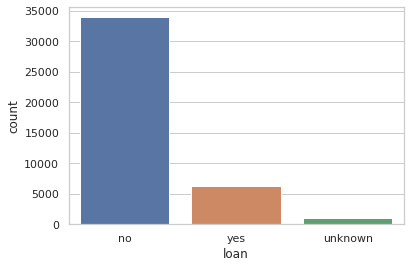

In [11]:
# Barplot for personal loan
sns.countplot(x="loan", data=data)
plt.show()

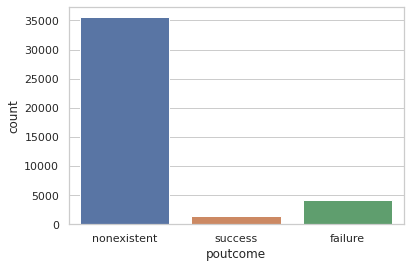

In [12]:
# Barplot for previous marketing campaign outcome
sns.countplot(x="poutcome", data=data)
plt.show()

Our prediction will be based on the customer’s job, marital status, whether he(she) has credit in default, whether he(she) has a housing loan, whether he(she) has a personal loan, and the outcome of the previous marketing campaigns. 

So, we will drop the variables that we do not need.

In [13]:
data.drop(data.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1, inplace=True)

In [14]:
data

,job,marital,default,housing,loan,poutcome,y
0,blue-collar,married,unknown,yes,no,nonexistent,0
1,technician,married,no,no,no,nonexistent,0
2,management,single,no,yes,no,success,1
3,services,married,no,no,no,nonexistent,0
4,retired,married,no,yes,no,success,1
...,...,...,...,...,...,...,...
41183,retired,married,unknown,no,yes,nonexistent,0
41184,housemaid,married,unknown,no,no,nonexistent,0
41185,admin.,single,unknown,yes,yes,nonexistent,0
41186,technician,married,no,no,yes,nonexistent,0


Data Preprocessing

Create dummy variables, that is variables with only two values, zero and one.


In logistic regression models, encoding all of the independent variables as dummy variables allows easy interpretation and calculation of the odds ratios, and increases the stability and significance of the coefficients.

In [23]:
data2 = pd.get_dummies(data, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])

In [24]:
data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [25]:
data2.head()

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1


In [26]:
# Drop the unknown columns
data2.drop(data2.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)
data2.columns


Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

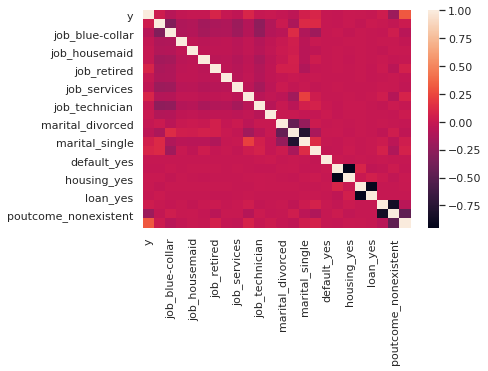

In [27]:
# Check the independence between the independent variables
sns.heatmap(data2.corr())
plt.show()

In [28]:
# Split the data into training and test sets
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
X_train.shape

(30891, 23)


Great! Now we can start building our logistic regression model.

Logistic Regression ModelFit logistic regression to the training set

In [30]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting the test set results and creating confusion matrix


The confusion_matrix() function will calculate a confusion matrix and return the result as an array.

In [31]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9046  110]
 [ 912  229]]


The result is telling us that we have 9046+229 correct predictions and 912+110 incorrect predictions.



Accuracy

In [32]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9156
           1       0.68      0.20      0.31      1141

    accuracy                           0.90     10297
   macro avg       0.79      0.59      0.63     10297
weighted avg       0.88      0.90      0.88     10297



***Interpretation:*** 

Of the entire test set, 88% of the promoted term deposit were the term deposit that the customers liked. 

Of the entire test set, 90% of the customer’s preferred term deposits that were promoted.